In [1]:
"""
GravMag: 3D forward modeling of total-field magnetic anomaly using triaxial
ellipsoids (model with induced and remanent magnetization)
"""
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from fatiando import mesher, gridder, utils
from fatiando.gravmag import ellipsoid_triaxial, ellipsoid_prolate, ellipsoid_oblate

C:\Users\diego_000\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# The regional field
inten,inc, dec = 60000., 30, -15
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=0)

## Triaxial

In [3]:
a = 500.
b = 100.
c = 50.
u = np.linspace(500., 30000., 200)

N1_l = []
N2_l = []
N3_l = []


for ui in u:
    model = [mesher.EllipsoidTriaxial(0.,0.,500.,a+ui,b+ui,c+ui,0.,0.,0., 
                                     {'remanence': [100, 90., 0.],
                                      'k': [0.2, 0.1, 0.05, 0., 90., 90.]})]

    # Calculate the anomaly for a given regional field
    tf,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model)
    N1_l.append(N1)
    N2_l.append(N2)
    N3_l.append(N3)

cte = np.ones_like(N1_l)/3

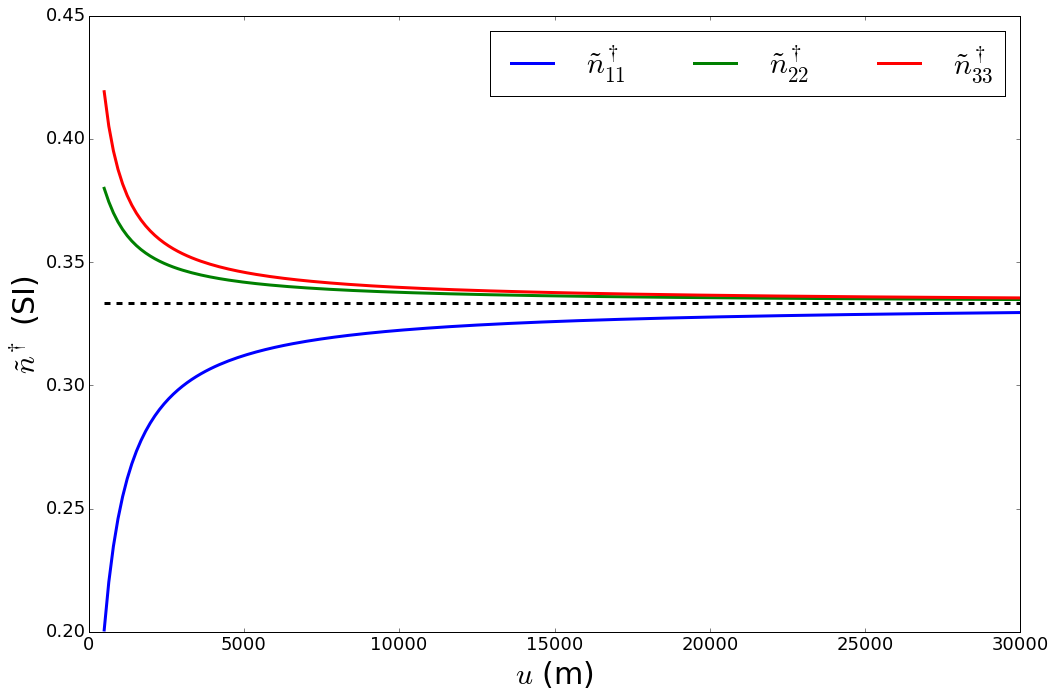

In [13]:
plt.figure(figsize=(15,10))
plt.plot(u,N1_l, label='$\\tilde{n}^{\dagger}_{11}$', linewidth=3.0)
plt.plot(u,N2_l, label='$\\tilde{n}^{\dagger}_{22}$', linewidth=3.0)
plt.plot(u,N3_l, label='$\\tilde{n}^{\dagger}_{33}$', linewidth=3.0)
plt.plot(u,cte, '--k', linewidth=3.0)
plt.legend(loc='upper right', ncol=3, fontsize=30)
plt.ylabel('$\\tilde{n}^{\dagger}$ (SI)', fontsize=30)
plt.xlabel('$u$ (m)', fontsize=30)
matplotlib.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.savefig('..\\manuscript\\figures\\test_n_triaxial.pdf', dpi = 600, facecolor='w', bbox_inches='tight')

In [4]:
N1_a = np.array(N1_l)
N2_a = np.array(N2_l)
N3_a = np.array(N3_l)

In [5]:
NN = N1_a+N2_a+N3_a
NN

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

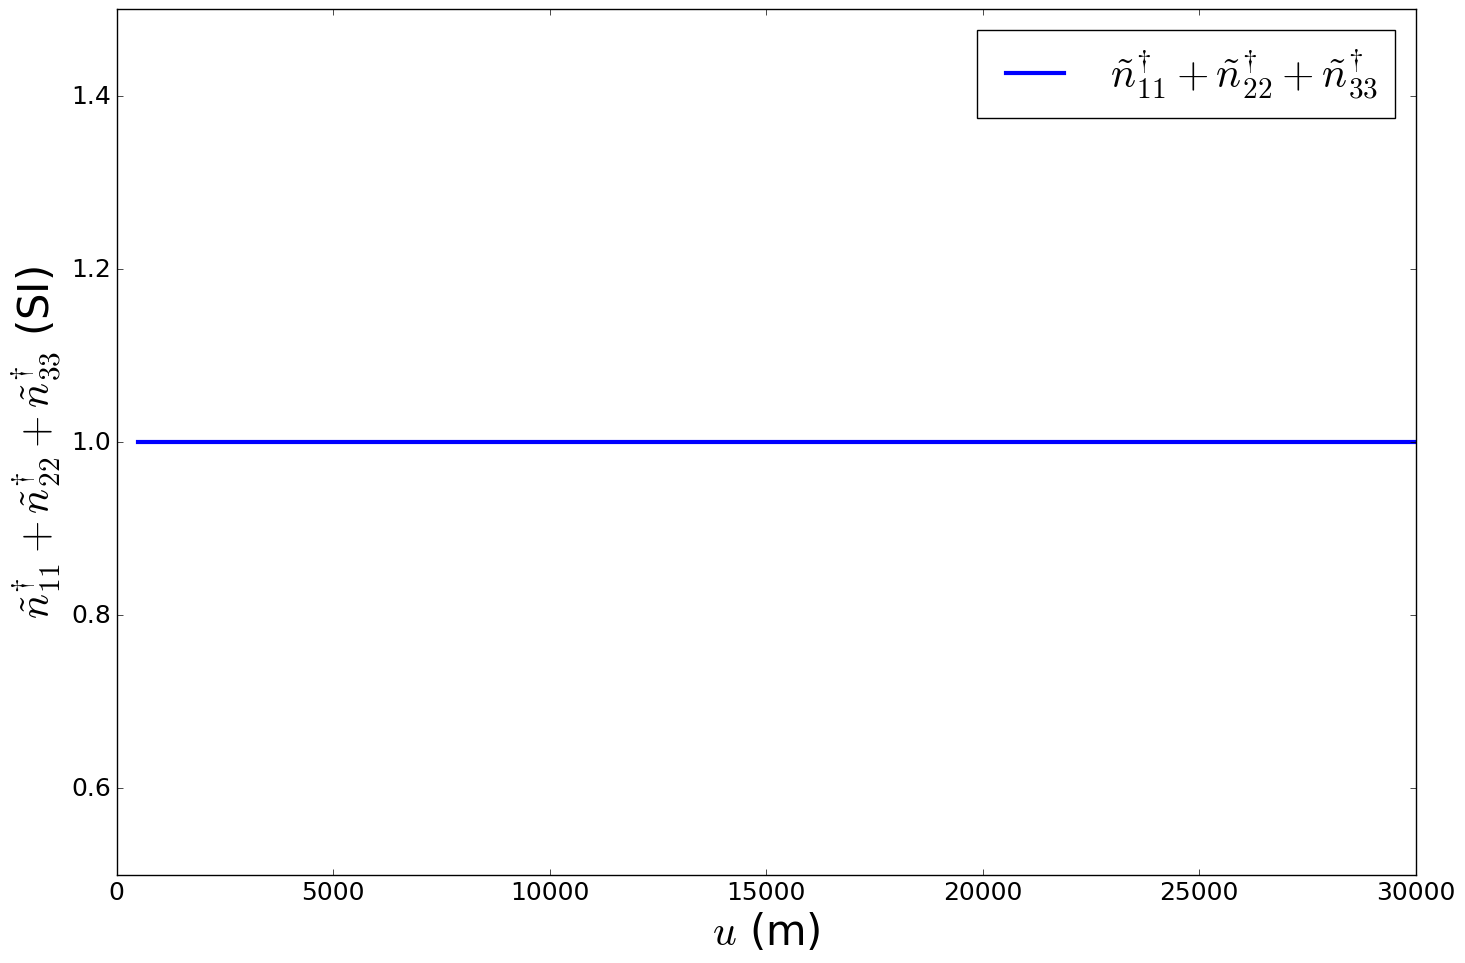

In [6]:
plt.figure(figsize=(15,10))
axes = plt.gca()
plt.plot(u,NN, label='$\\tilde{n}^{\dagger}_{11}+\\tilde{n}^{\dagger}_{22}+\\tilde{n}^{\dagger}_{33}$', linewidth=3.0)
plt.legend(loc='best', ncol=1, fontsize=30)
plt.ylabel('$\\tilde{n}^{\dagger}_{11}+\\tilde{n}^{\dagger}_{22}+\\tilde{n}^{\dagger}_{33}$ (SI)', fontsize=30)
plt.xlabel('$u$ (m)', fontsize=30)
axes.set_ylim([0.5,1.5])
matplotlib.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.savefig('..\\manuscript\\figures\\test_n_soma.pdf', dpi = 600, facecolor='w', bbox_inches='tight')

## Prolate

In [25]:
b1 = 100.
m1 = np.linspace(1.1, 100., 200)
a1 = b1*m1

N1_l2 = []
N2_l2 = []

for ai1 in a1:
    model = [mesher.EllipsoidProlate(0.,0.,500.,ai1,b1,0.,0.,0.,
                                     {'remanence': [10000, 90., 0.],
                                      'k': [0.2, 0.1, 0.05, 0., 90., 90.]})]

    # Calculate the anomaly for a given regional field
    tf2,N12,N22 = ellipsoid_prolate.tf_c(xp,yp,zp,inten,inc,dec,model)
    N1_l2.append(N12)
    N2_l2.append(N22)
N1_l2 = np.array(N1_l2)
N2_l2 = np.array(N2_l2)
cte2 = np.ones_like(N1_l2)/3

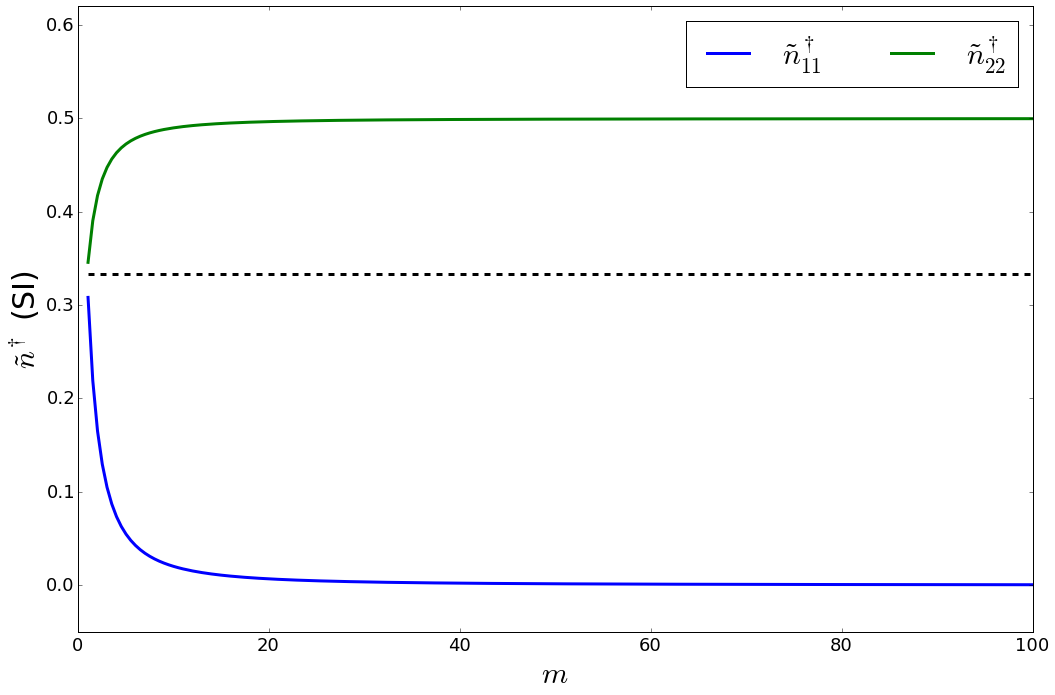

In [26]:
plt.figure(figsize=(15,10))
axes = plt.gca()
plt.plot(m1,N1_l2, label='$\\tilde{n}^{\dagger}_{11}$', linewidth=3.0)
plt.plot(m1,N2_l2, label='$\\tilde{n}^{\dagger}_{22}$', linewidth=3.0)
plt.plot(m1,cte2, '--k', linewidth=3.0)
axes.set_ylim([-0.05,0.62])
plt.legend(loc='best', ncol=2, fontsize = 30)
plt.ylabel('$\\tilde{n}^{\dagger}$ (SI)', fontsize=30)
plt.xlabel('$m$', fontsize=30)
matplotlib.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.savefig('..\\manuscript\\figures\\test_n_prolate.pdf', dpi = 600, facecolor='w', bbox_inches='tight')

## Oblate

In [23]:
b2 = 1000.
m2 = np.linspace(0.05, 1.0, 200, endpoint=False)
a2 = b2*m2

N1_l3 = []
N2_l3 = []

for ai2 in (a2):
    model = [mesher.EllipsoidOblate(0.,0.,500,ai2,b2,0.,0.,0.,
                                     {'remanence': [10000, 90., 0.],
                                      'k': [0.2, 0.1, 0.05, 0., 90., 90.]})]

    # Calculate the anomaly for a given regional field
    tf3,N13,N23 = ellipsoid_oblate.tf_c(xp,yp,zp,inten,inc,dec,model)
    N1_l3.append(N13)
    N2_l3.append(N23)
N1_l3 = np.array(N1_l3)
N2_l3 = np.array(N2_l3)
cte3 = np.ones_like(N1_l3)/3

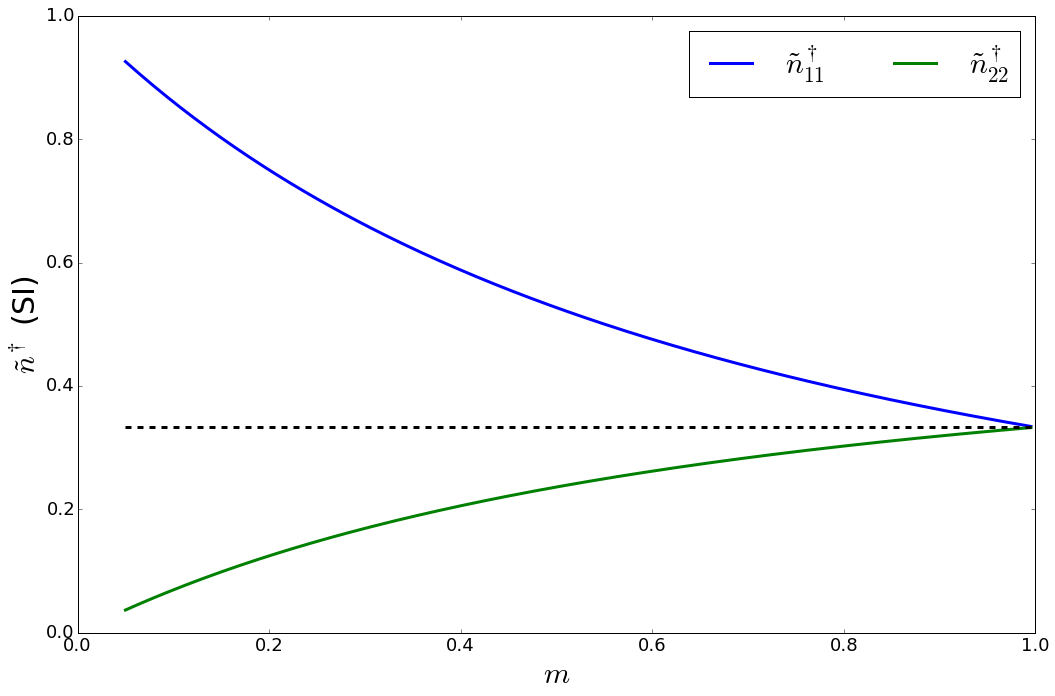

In [24]:
plt.figure(figsize=(15,10))
axes = plt.gca()
plt.plot(m2,N1_l3, label='$\\tilde{n}^{\dagger}_{11}$', linewidth=3.0)
plt.plot(m2,N2_l3, label='$\\tilde{n}^{\dagger}_{22}$', linewidth=3.0)
plt.plot(m2,cte3, '--k', linewidth=3.0)
plt.legend(loc='upper right', ncol=2, fontsize = 30)
plt.ylabel('$\\tilde{n}^{\dagger}$ (SI)', fontsize=30)
plt.xlabel('$m$', fontsize=30)
matplotlib.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.savefig('..\\manuscript\\figures\\test_n_oblate.pdf', dpi = 600, facecolor='w', bbox_inches='tight')